# Fashion-MNIST 辨识

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## 载入套件

In [1]:
import os
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchmetrics import Accuracy
from torchvision import transforms
from torchvision.datasets import FashionMNIST

## 设定参数

In [2]:
PATH_DATASETS = "" # 预设路径
BATCH_SIZE = 1024  # 批量
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
"cuda" if torch.cuda.is_available() else "cpu"

'cuda'

## 步骤1：载入 FashionMNIST

In [3]:
# 下载 FashionMNIST 手写阿拉伯数字 训练资料
train_ds = FashionMNIST(PATH_DATASETS, train=True, download=True, 
                 transform=transforms.ToTensor())

# 下载测试资料
test_ds = FashionMNIST(PATH_DATASETS, train=False, download=True, 
                 transform=transforms.ToTensor())

# 训练/测试资料的维度
print(train_ds.data.shape, test_ds.data.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [4]:
# 训练资料前10笔图片的数字
train_ds.targets[:10]

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [5]:
# 显示第1张图片内含值
train_ds.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [6]:
# 将非0的数字转为1，显示第1张图片
data = train_ds.data[0].clone()
data[data>0]=1
data = data.numpy()

# 将转换后二维内容显示出来，隐约可以看出数字为 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001001100110000110',
 '0000000000001011111000111001',
 '0000000000001011111110000110',
 '0000000000000011111111111111',
 '0000000000010111111111111111',
 '0000000001110111111111111110',
 '0000000000000111111111111110',
 '0000000000000111111111111110',
 '0000000001101111111111111111',
 '0000000000101111111111111111',
 '0000000001001111111111111110',
 '0011111000001111111111111110',
 '0100000001111111111111111110',
 '0000111111111111111111111110',
 '0111111111111111111111111110',
 '1111111111111111111111111110',
 '1111111111111111111111111111',
 '1111111111111111111111111111',
 '1111111111111111111111111111',
 '0111111111111111111111111111',
 '0011111111111111111111111110',
 '1000111111111111111111111100',
 '0000000111111000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

In [7]:
# 将非0的数字转为1，显示第2张图片
data = train_ds.data[1].clone()
data[data>0]=1
data = data.numpy()

# 将转换后二维内容显示出来，隐约可以看出数字为 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000010000111111111100000000',
 '0001000111111111111111100000',
 '0000011111111111111111110000',
 '0000011111111111111111111000',
 '0000111111111111111111111000',
 '0000111111111111111111111000',
 '0000111111011011111011111100',
 '0000111111011111111011111100',
 '0001111111011111111011111100',
 '0001111111111111111111111100',
 '0001111111111111111111111100',
 '0000011111111111111111000000',
 '0000000111111111111111000000',
 '0000110111111111111111011000',
 '0000010111111111111111010000',
 '0000010111111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000000011111111111111010000',
 '0000010011111111111111010000',
 '0000010011111111111111010000',
 '0000000011111111111111000000',
 '0000000011111111111111010000',
 '0000010011111111111111000000']

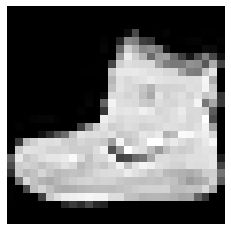

In [8]:
# 显示第1张图片图像
import matplotlib.pyplot as plt

# 第一笔资料
X = train_ds.data[0]

# 绘制点阵图，cmap='gray':灰阶
plt.imshow(X.reshape(28,28), cmap='gray')

# 隐藏刻度
plt.axis('off') 

# 显示图形
plt.show() 

## 步骤2：资料清理，此步骤无需进行

## 步骤3：特征工程，此步骤无需进行

In [9]:
# train_ds.data = train_ds.data / 255.0
# test_ds.data = test_ds.data / 255.0

## 步骤4：资料分割，此步骤无需进行，载入MNIST资料时，已经切割好了

## 步骤5：建立模型结构

In [10]:
# 建立模型
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28 * 28, 256), 
    nn.Dropout(0.2),
    torch.nn.Linear(256, 10), 
    # 使用nn.CrossEntropyLoss()时，不需要将输出经过softmax层，否则计算的损失会有误
    # torch.nn.Softmax(dim=1)
).to(device)

## 步骤6：结合训练资料及模型，进行模型训练

In [11]:
epochs = 5
lr=0.1

# 建立 DataLoader
train_loader = DataLoader(train_ds, batch_size=600)

# 设定优化器(optimizer)
# optimizer = torch.optim.Adam(model.parameters(), lr=lr)
optimizer = torch.optim.Adadelta(model.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

model.train()
loss_list = []    
for epoch in range(1, epochs + 1):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
#         if batch_idx == 0 and epoch == 1: print(data[0])

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            loss_list.append(loss.item())
            batch = batch_idx * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * batch_idx / len(train_loader))
            print(f'Epoch {epoch}: [{batch:5d} / {data_count}] ({percentage:.0f} %)' +
                  f'  Loss: {loss.item():.6f}')

Epoch 1: [    0 / 60000] (0 %)  Loss: 2.336220
Epoch 1: [ 6000 / 60000] (10 %)  Loss: 1.870095
Epoch 1: [12000 / 60000] (20 %)  Loss: 1.546199
Epoch 1: [18000 / 60000] (30 %)  Loss: 1.324785
Epoch 1: [24000 / 60000] (40 %)  Loss: 1.161149
Epoch 1: [30000 / 60000] (50 %)  Loss: 1.011089
Epoch 1: [36000 / 60000] (60 %)  Loss: 0.970599
Epoch 1: [42000 / 60000] (70 %)  Loss: 0.873397
Epoch 1: [48000 / 60000] (80 %)  Loss: 0.776344
Epoch 1: [54000 / 60000] (90 %)  Loss: 0.840769
Epoch 2: [    0 / 60000] (0 %)  Loss: 0.815157
Epoch 2: [ 6000 / 60000] (10 %)  Loss: 0.783083
Epoch 2: [12000 / 60000] (20 %)  Loss: 0.736347
Epoch 2: [18000 / 60000] (30 %)  Loss: 0.775184
Epoch 2: [24000 / 60000] (40 %)  Loss: 0.754036
Epoch 2: [30000 / 60000] (50 %)  Loss: 0.666138
Epoch 2: [36000 / 60000] (60 %)  Loss: 0.724891
Epoch 2: [42000 / 60000] (70 %)  Loss: 0.656721
Epoch 2: [48000 / 60000] (80 %)  Loss: 0.573520
Epoch 2: [54000 / 60000] (90 %)  Loss: 0.691825
Epoch 3: [    0 / 60000] (0 %)  Loss: 0.65

## 对训练过程的损失绘图

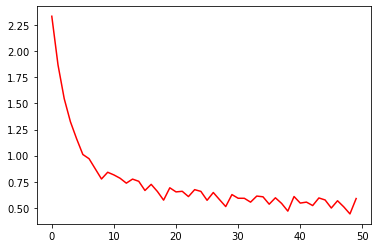

In [12]:
import matplotlib.pyplot as plt

plt.plot(loss_list, 'r')

## 步骤7：评分(Score Model)

In [13]:
# 建立 DataLoader
test_loader = DataLoader(test_ds, shuffle=False, batch_size=BATCH_SIZE)

model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        
        # sum up batch loss
        test_loss += criterion(output, target).item()
        
        # 预测
        pred = output.argmax(dim=1, keepdim=True)  
        
        # 正确笔数
        correct += pred.eq(target.view_as(pred)).sum().item()

# 平均损失
data_count = len(test_loader.dataset)
test_loss /= data_count
# 显示测试结果
percentage = 100. * correct / data_count
print(f'平均损失: {test_loss:.4f}, 准确率: {correct}/{data_count}' + 
      f' ({percentage:.0f}%)\n')

平均损失: 0.0005, 准确率: 8099/10000 (81%)



## 实际比对测试资料的前20笔

In [14]:
# 实际预测 20 笔资料
predictions = []
with torch.no_grad():
    for i in range(20):
        data, target = test_ds[i][0], test_ds[i][1]
        data = data.reshape(1, *data.shape).to(device)
        output = torch.argmax(model(data), axis=-1)
        predictions.append(str(output.item()))

# 比对
print('actual    :', test_ds.targets[0:20].numpy())
print('prediction: ', ' '.join(predictions[0:20]))

actual    : [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
prediction:  9 2 1 1 6 1 4 6 7 7 4 5 5 3 4 1 2 6 8 0


In [15]:
# 显示第 18 笔的机率
import numpy as np

i=17
data = test_ds[i][0]
data = data.reshape(1, *data.shape).to(device)
#print(data.shape)
predictions = torch.softmax(model(data), dim=1)
print(f'0~9预测机率: {np.around(predictions.cpu().detach().numpy(), 2)}')
print(f'0~9预测机率: {np.argmax(predictions.cpu().detach().numpy(), axis=-1)}')

0~9预测机率: [[0.05 0.   0.25 0.   0.29 0.   0.39 0.   0.01 0.  ]]
0~9预测机率: [6]


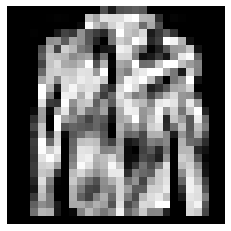

In [16]:
# 显示第 18 笔图像
X2 = test_ds[i][0] 
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

## 步骤8：评估，暂不进行

## 步骤9：模型布署

In [18]:
torch.save(model, './FashionMNIST.pt')

## 步骤10：新资料预测

In [20]:
label_dict = {
    0: 'T-shirt', 
    1:'Trouser',
    2:'Pullover', 
    3:'Dress', 
    4:'Coat',
    5:'Sandal', 
    6:'Shirt', 
    7:'Sneaker', 
    8:'Bag', 
    9:'Ankle boot'
}

In [21]:
# 使用小画家，绘制 0~9，实际测试看看
from skimage import io
from skimage.transform import resize
import numpy as np
import os

# 读取影像并转为单色
test_data_folder = './fashion_test_data'
for file_name in os.listdir(test_data_folder):
    image1 = io.imread(os.path.join(test_data_folder, file_name), as_gray=True)

    # 缩为 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1,28, 28) #/ 255.0

    # 反转颜色，颜色0为白色，与 RGB 色码不同，它的 0 为黑色
    X1 = torch.FloatTensor(1-X1).to(device)

    # 预测
    predictions = torch.softmax(model(X1), dim=1)
    # print(np.around(predictions.cpu().detach().numpy(), 2))
    print(f'actual/prediction: {file_name.split(".")[0]}/{label_dict[np.argmax(predictions.detach().cpu().numpy())]}')

actual/prediction: bag1/Bag
actual/prediction: Sandal1/Bag
actual/prediction: Sandal2/Bag
actual/prediction: shirt1/Shirt
actual/prediction: T-Shirt/Shirt
actual/prediction: Trouser/T-shirt
actual/prediction: Trouser2/Trouser
